In [1]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import math

In [2]:
cv = 10

In [3]:
dataset = load_digits()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [4]:
estimator = DecisionTreeClassifier(random_state=0)

cross_val_score(estimator, X, y, cv=cv).mean()

0.8303337234738853

In [5]:
estimator_bag = BaggingClassifier(n_estimators=100)

cross_val_score(estimator_bag, X, y, cv=cv).mean()

0.9204877544471748

In [6]:
estimator_bag_fix_feat = BaggingClassifier(n_estimators=100, max_features=int(math.sqrt(X.shape[1])))

cross_val_score(estimator_bag_fix_feat, X, y, cv=cv).mean()

0.9432748782301713

In [7]:
estimator_auto = DecisionTreeClassifier(random_state=0, max_features='auto')
estimator_bag_auto = BaggingClassifier(estimator_auto, n_estimators=100)

cross_val_score(estimator_bag_auto, X, y, cv=cv).mean()

0.9499886559499842

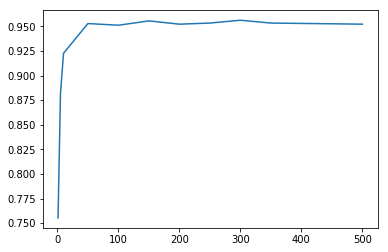

In [8]:
n = (1, 5, 10, 50, 100, 150, 200, 250, 300, 350, 500)
x = []
for i in n:
    estimator_forest = RandomForestClassifier(n_estimators=i)

    x.append(cross_val_score(estimator_forest, X, y, cv=cv).mean())
plt.plot(n, x)

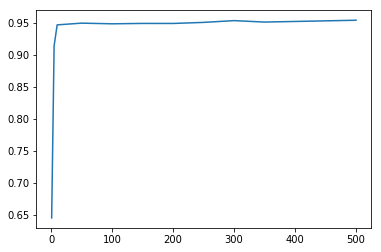

In [9]:
n = (1, 5, 10, 50, 100, 150, 200, 250, 300, 350, 500)
x = []
for i in n:
    estimator_forest = RandomForestClassifier(n_estimators=50, max_depth=i)

    x.append(cross_val_score(estimator_forest, X, y, cv=cv).mean())
plt.plot(n, x)

In [59]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
def gbm_predict(X):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [53]:
boston = load_boston()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, shuffle=False)
base_algorithms_list = []
coefficients_list = []
s = y_train
for i in range(50):
    coefficients_list.append(0.9 / (1.0 + i))
    new_model = DecisionTreeRegressor(max_depth=5, random_state=42)
    new_model.fit(X_train, s)
    base_algorithms_list.append(new_model)
    s = y_train - gbm_predict(X_train)
    
error = mean_squared_error(y_test, gbm_predict(X_test))
rmse = error**0.5
print (rmse)

4.812550945781193


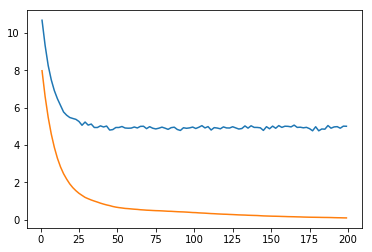

In [70]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, shuffle=False)
n = np.arange(1, 200, 2)
errors = []
errors_train = []
for i in n:
    model = GradientBoostingRegressor(n_estimators=i, max_depth=5)
    model.fit(X_train, y_train)
    errors.append(mean_squared_error(y_test, model.predict(X_test))**0.5)
    errors_train.append(mean_squared_error(y_train, model.predict(X_train))**0.5)
plt.plot(n, errors)
plt.plot(n, errors_train)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)
mean_squared_error(y_test, model.predict(X_test))**0.5

8.254979753549161